In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [3]:
# Set up S3 import
!pip install boto3
import boto3

BUCKET_NAME = 'ecommerce-machine-learning-resources-5.29.23'

from config import aws_access_key_id, aws_secret_access_key, region

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Authentication credentials for S3
s3 = boto3.resource('s3',aws_access_key_id = aws_access_key_id, aws_secret_access_key = aws_secret_access_key)
KEY = 'cleaned_data.csv'
# Import file
s3.Bucket(BUCKET_NAME).download_file(KEY,'cleaned_data.csv')

In [5]:
import os
# Set up Spark variables
spark_version = 'spark-3.4.0'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Install dependencies
import findspark

# Start a SparkSession
findspark.init()


from pyspark.sql import SparkSession

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,057 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,774 kB]
Get:

In [6]:
# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

# Import additional dependency
from pyspark import SparkFiles

In [7]:
# Create Spark dataframe
spark.sparkContext.addFile('/content/cleaned_data.csv')
df_spark = spark.read.csv(SparkFiles.get("cleaned_data.csv"),header=True,inferSchema=True,quote="\"",escape="\"")
df_spark.show()

+---+----------+-----+------+--------------------+--------------------+------+--------+-----------------+------------------+-----------------+-------------+---------------+---------+--------------------+-----------+----------+--------------+---------------+---+--------------------+---------------+--------------+
|_c0|CustomerID|Churn|Tenure|PreferredLoginDevice|PreferredPaymentMode|Gender|AppHours|RegisteredDevices| PreferredCategory|SatisfactionScore|MaritalStatus|NumberAddresses|Complaint|OrderIncreasePercent|CouponsUsed|OrderCount|DaysSinceOrder|AverageCashback|Age|                Race|HouseholdIncome|PersonalIncome|
+---+----------+-----+------+--------------------+--------------------+------+--------+-----------------+------------------+-----------------+-------------+---------------+---------+--------------------+-----------+----------+--------------+---------------+---+--------------------+---------------+--------------+
|  0|     50001|    1|   4.0|        Mobile Phone|        

In [8]:
# Convert Spark DF to Pandas DF
df_spark.createOrReplaceTempView("customers")
df = spark.sql("""SELECT * FROM customers""").toPandas()

In [9]:
# Reset index
df.set_index("CustomerID",inplace=True)
df

,_c0,Churn,Tenure,PreferredLoginDevice,PreferredPaymentMode,Gender,AppHours,RegisteredDevices,PreferredCategory,SatisfactionScore,...,Complaint,OrderIncreasePercent,CouponsUsed,OrderCount,DaysSinceOrder,AverageCashback,Age,Race,HouseholdIncome,PersonalIncome
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,0,1,4.0,Mobile Phone,Debit Card,Female,3.0,3,Laptop & Accessory,2,...,1,11.0,1.0,1.0,5.0,160,80,White,53704.40,53704.40
50004,3,1,0.0,Mobile Phone,Debit Card,Male,2.0,4,Laptop & Accessory,5,...,0,23.0,0.0,1.0,3.0,134,20,Other,99863.00,6798.03
50006,5,1,0.0,Computer,Debit Card,Female,3.0,5,Mobile Phone,5,...,1,22.0,4.0,6.0,7.0,139,60,White,50985.19,50985.19
50012,11,1,11.0,Mobile Phone,Debit Card,Male,3.0,4,Fashion,3,...,1,13.0,0.0,1.0,0.0,154,29,Black,53024.60,16995.06
50013,12,1,0.0,Mobile Phone,Cash on Delivery,Male,2.0,3,Mobile,3,...,1,13.0,2.0,2.0,2.0,134,39,White,18184.72,18184.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55625,5624,0,1.0,Mobile Phone,Unified Payment Interface,Female,2.0,5,Mobile Phone,3,...,0,19.0,2.0,2.0,1.0,155,24,White,191194.47,63731.49
55626,5625,0,10.0,Computer,Credit Card,Male,3.0,2,Laptop & Accessory,1,...,0,18.0,1.0,2.0,4.0,151,36,White,103160.04,101970.38
55628,5627,0,1.0,Mobile Phone,Debit Card,Male,3.0,2,Laptop & Accessory,4,...,1,21.0,1.0,2.0,4.0,186,63,White,95172.36,64581.24


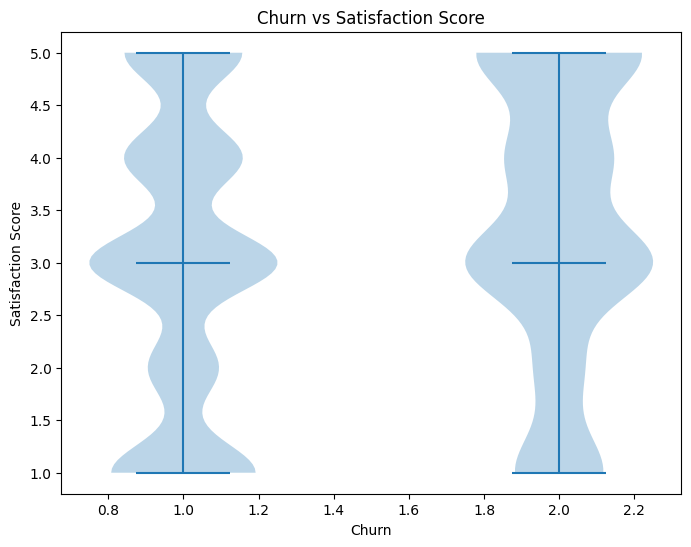

In [10]:
#Do preliminary charting for analysis
# Satisfaction score and churn
plt.figure(figsize=(8, 6))
violin_parts = plt.violinplot([df[df['Churn'] == False]['SatisfactionScore'],
                              df[df['Churn'] == True]['SatisfactionScore']],
                             showmedians=True)
# plt.xticks([1, 2], ['False', 'True'])
plt.xlabel('Churn')
plt.ylabel('Satisfaction Score')
plt.title('Churn vs Satisfaction Score')
plt.show()

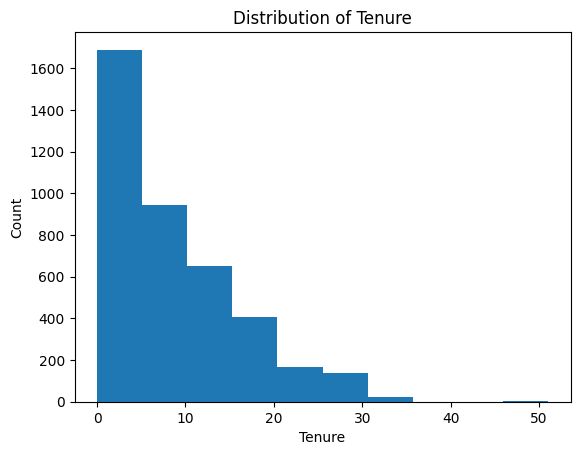

In [11]:
#Levels of membership by Tenure
years_membership =df['Tenure']
plt.hist(years_membership)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure')
plt.show()

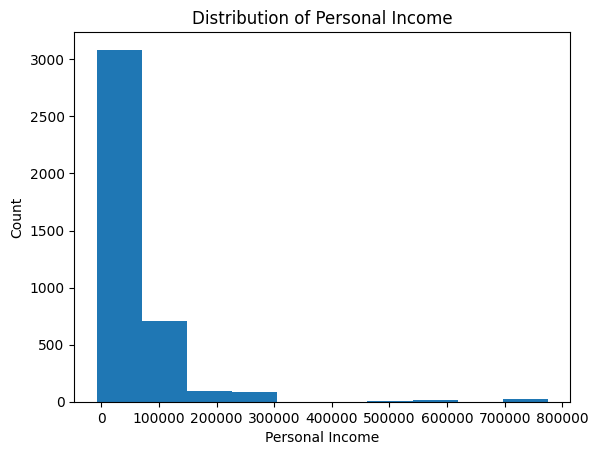

In [12]:
#Levels of membership by personal income
income =df['PersonalIncome']
plt.hist(income)
plt.xlabel('Personal Income')
plt.ylabel('Count')
plt.title('Distribution of Personal Income')
plt.show()

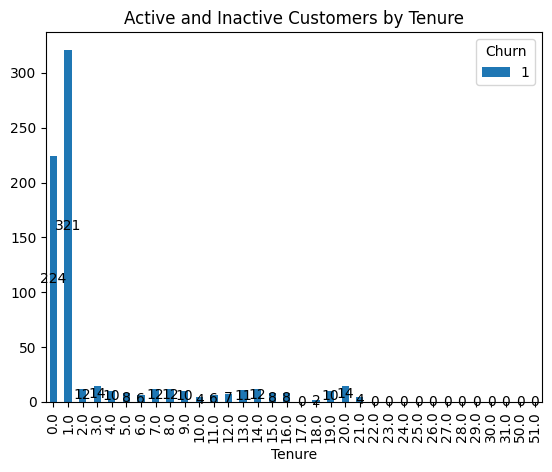

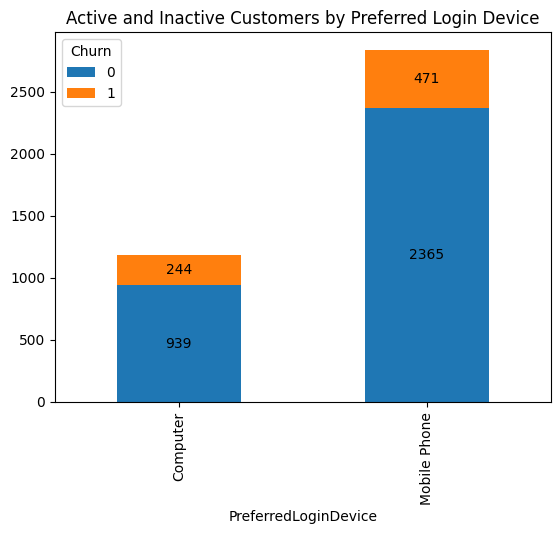

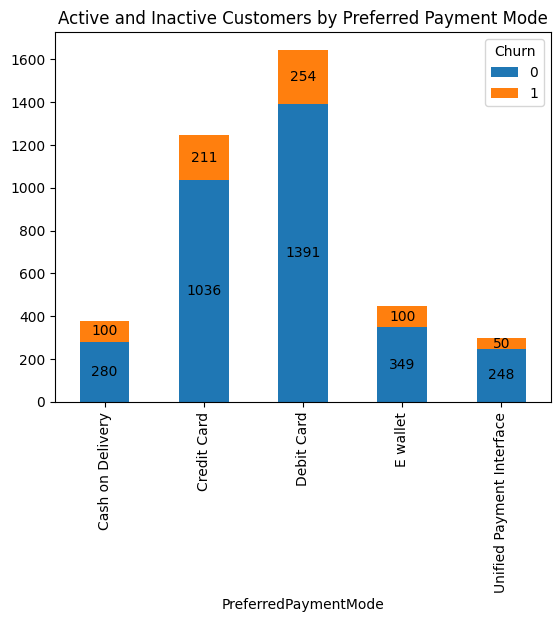

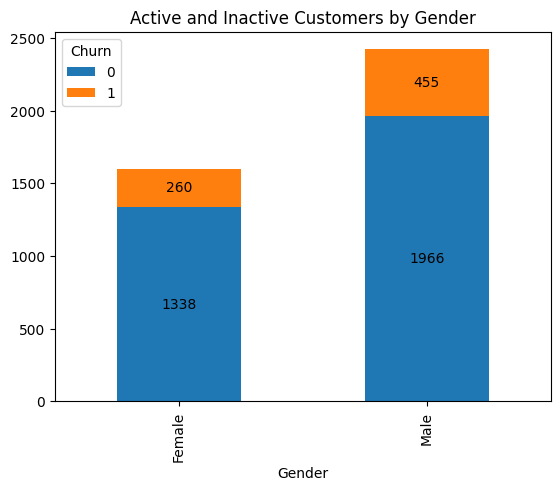

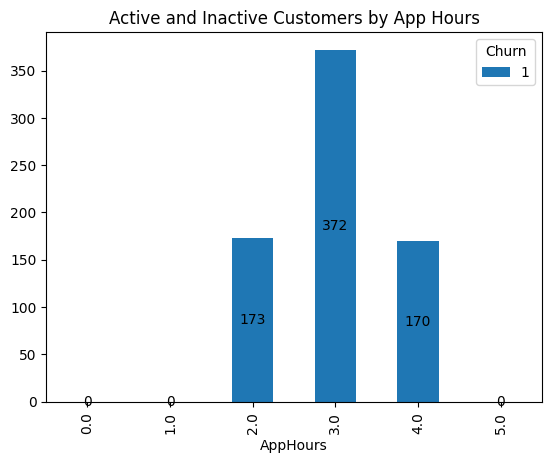

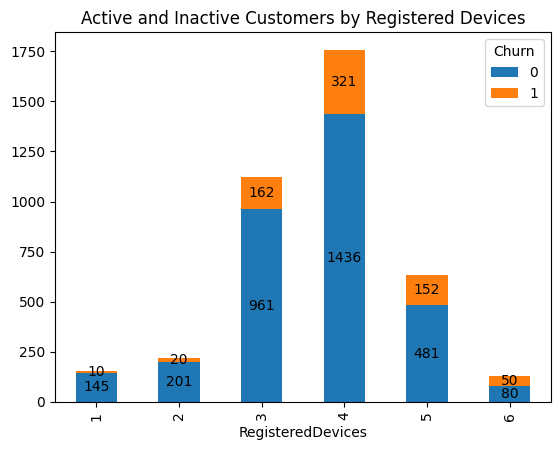

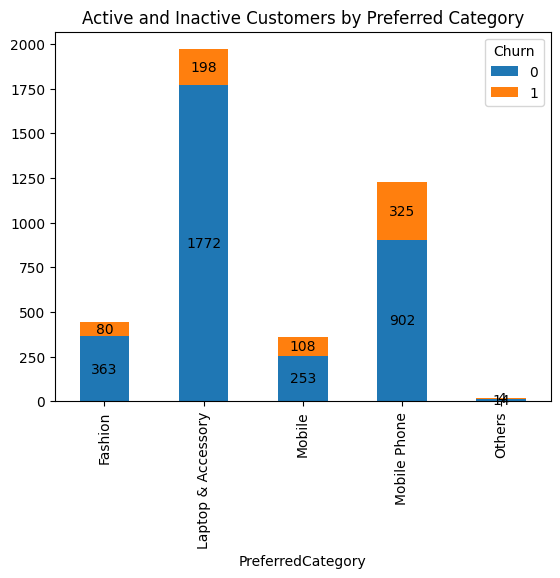

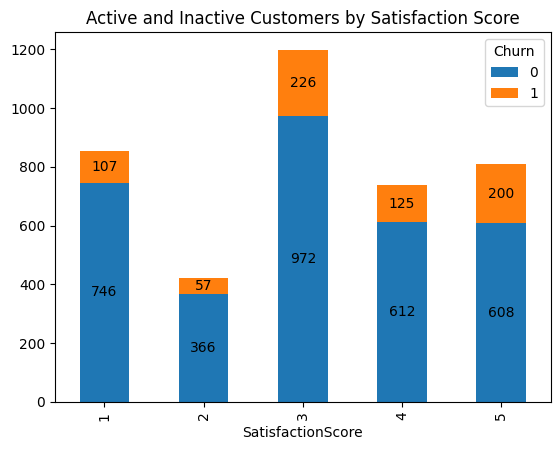

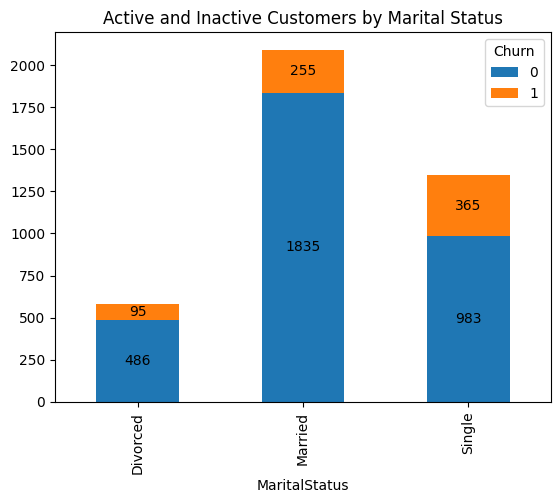

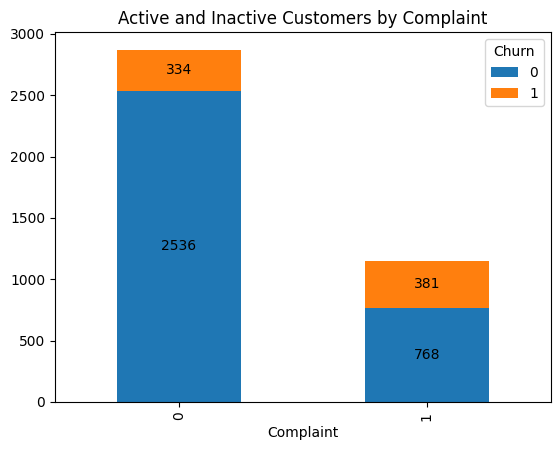

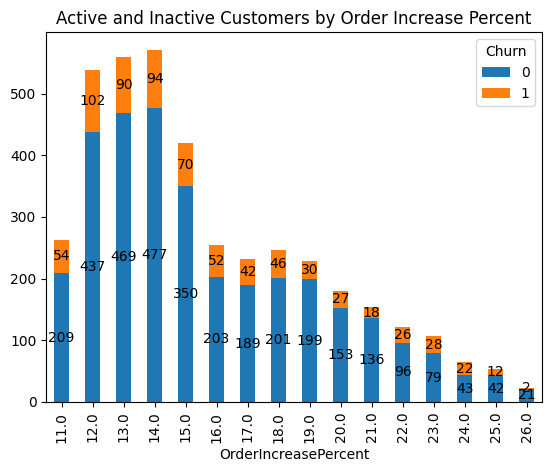

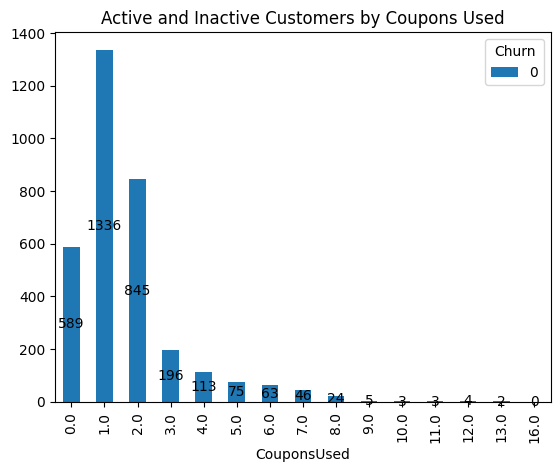

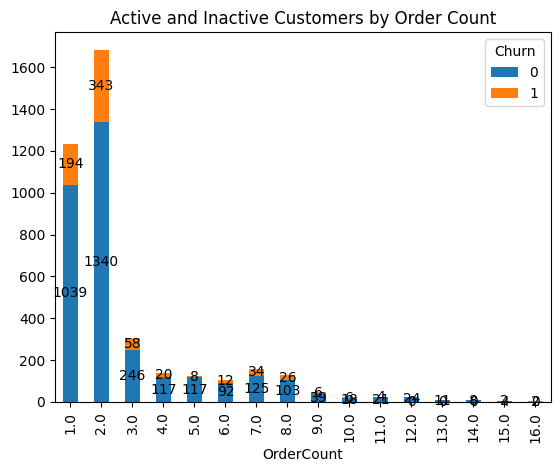

In [18]:
#Plotting churn versus tracked factors
cols = ['Tenure', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',	'AppHours',	'RegisteredDevices',	'PreferredCategory',	
        'SatisfactionScore',	'MaritalStatus', 'Complaint',	'OrderIncreasePercent',	'CouponsUsed','OrderCount']
       # 'DaysSinceOrder','AverageCashback',	'Age',	'Race',	'HouseholdIncome',	'PersonalIncome'] These columns don't show well as bar charts
       
for col in cols:
  col_churn = df.groupby([col, 'Churn']).size().unstack()
  col_churn = col_churn.replace({1:'True',0:'False'})
  plot=col_churn.plot(kind='bar',stacked=True)
  for container in plot.containers:
    plot.bar_label(container, label_type='center',color='black')
  plt.xlabel=(f'{col}')
  plt.ylabel=('Count')
  col_formatted = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', col)
  plt.title(f'Active and Inactive Customers by {col_formatted}')
  plt.savefig(f'{col_formatted}')
  plt.show()
  plt.close()

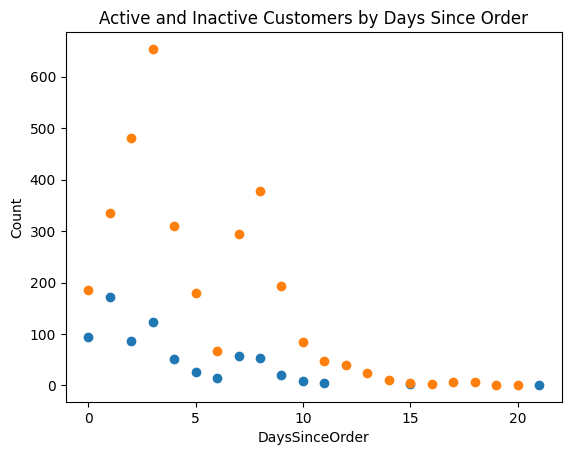

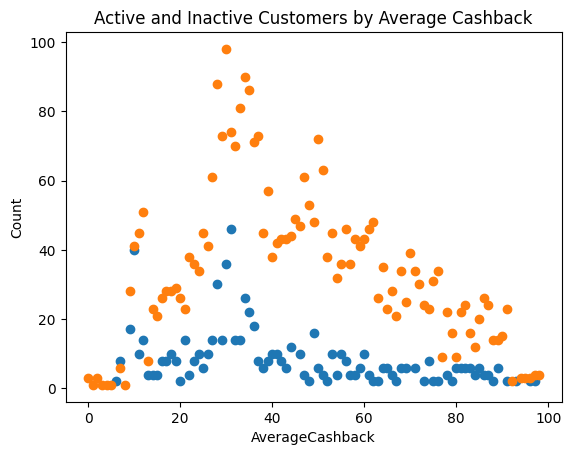

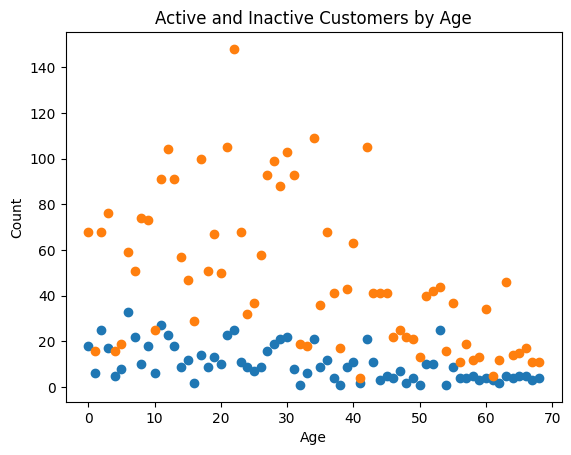

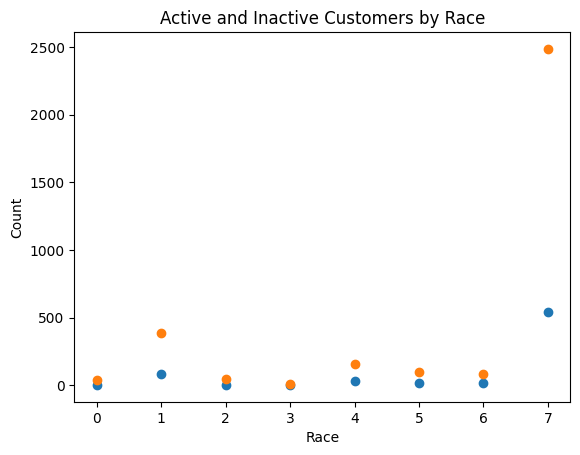

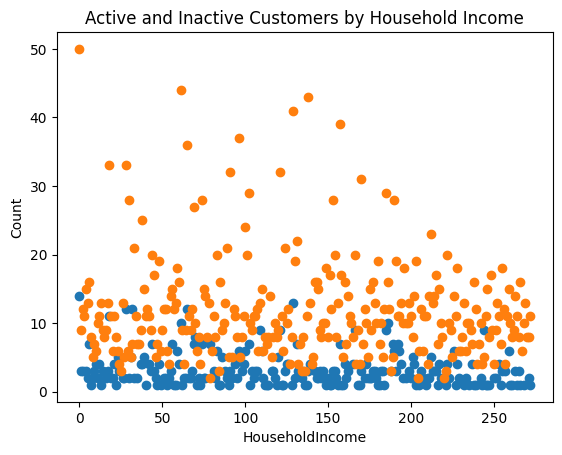

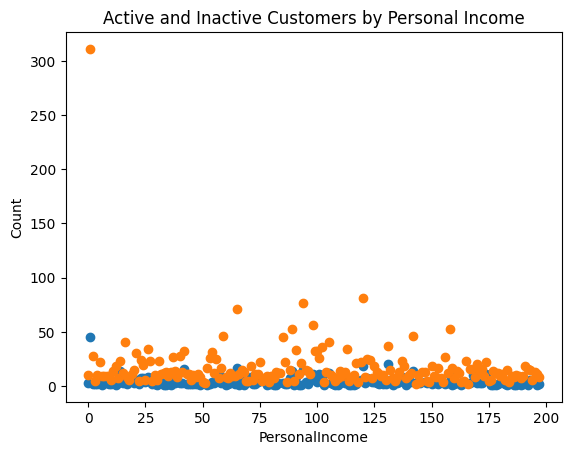

In [14]:
cols= ['DaysSinceOrder', 'AverageCashback',	'Age',	'Race',	'HouseholdIncome',	'PersonalIncome'] 
for col in cols:
    col_churn = df.groupby([col, 'Churn']).size().unstack()
  # col_churn = col_churn.replace({1: 'True', 0: 'False'})

    # switch to scatterplots
    fig, ax = plt.subplots()
    x = range(len(col_churn))
    y_true = col_churn[1]
    y_false = col_churn[0]
   
    ax.scatter(x, y_true, label='Churned')
    ax.scatter(x, y_false, label='Active')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    col_formatted = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', col)
    ax.set_title(f'Active and Inactive Customers by {col_formatted}')
    plt.show()

In [15]:
# Evaluate Percent Churn
len(df.loc[df["Churn"]==1])/len(df)

0.17790495148046778

We are using Detroit, MI as our city, since the average income aligns most closely. Detroit's population is 620,376 as of 2022. This is 465,902 adults in 250,096 households. Population Data from [Census.gov](https://www.census.gov/quickfacts/fact/table/detroitcitymichigan,MI/AGE295221)
88% of the population in Detroit owns a computer, therefore making the market at least 88% of the total population, or 409,994 adults.

In [16]:
# Total Customers
print("Total Customers:" + str(len(df)))
print("Active Customers:" + str(len(df.loc[df["Churn"]==0])))
print("Inactive Customers:" + str(len(df.loc[df["Churn"]==1])))
print("Percent Penetration:" + str(len(df)/409994*100) + "%")

Total Customers:4019
Active Customers:3304
Inactive Customers:715
Percent Penetration:0.9802582476816735%
